In [1]:
#ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Matplotlib ÊòØPython‰∏≠ÁöÑÁªòÂõæÂ∑•ÂÖ∑
import seaborn as sns
from pylab import mpl
#ÁîªÂõæ‰∏≠ÁöÑÊòæÁ§∫‰∏≠Êñá
plt.rcParams['font.family']='Microsoft YaHei'#Ê≠£Â∏∏ÊòæÁ§∫‰∏≠Êñá
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.unicode_minus'] = False
from sklearn import model_selection
from sklearn.linear_model import Ridge,RidgeCV
import warnings
from pyecharts import *
from dateutil.parser import parse
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing  
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA 
import xgboost as xgb
warnings.filterwarnings("ignore")
%matplotlib inline
#pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)

## Êé¢Á¥¢ÊÄßÂàÜÊûê

In [2]:
train = pd.read_csv('D:/edge/d_train.csv',encoding='gbk')#ËØªÂÖ•ËÆ≠ÁªÉÈõÜ
train.describe()

id           ÊÄßÂà´           Âπ¥ÈæÑ  *Â§©Èó®ÂÜ¨Ê∞®ÈÖ∏Ê∞®Âü∫ËΩ¨Êç¢ÈÖ∂    *‰∏ôÊ∞®ÈÖ∏Ê∞®Âü∫ËΩ¨Êç¢ÈÖ∂  \
count  5641.000000  5641.000000  5641.000000  4420.000000  4420.000000   
mean   2866.589434     0.490161    45.579153    26.804238    27.651278   
std    1655.422484     0.499948    12.962719    13.564091    22.614025   
min       1.000000     0.000000     3.000000    10.040000     0.120000   
25%    1434.000000     0.000000    35.000000    20.250000    15.130000   
50%    2871.000000     0.000000    45.000000    23.890000    21.475000   
75%    4303.000000     1.000000    54.000000    29.270000    32.317500   
max    5732.000000     1.000000    93.000000   434.950000   498.890000   

            *Á¢±ÊÄßÁ£∑ÈÖ∏ÈÖ∂   *r-Ë∞∑Ê∞®ÈÖ∞Âü∫ËΩ¨Êç¢ÈÖ∂         *ÊÄªËõãÁôΩ          ÁôΩËõãÁôΩ         *ÁêÉËõãÁôΩ  ...  \
count  4420.000000  4420.000000  4420.000000  4420.000000  4420.000000  ...   
mean     87.460595    38.782283    76.771495    45.823210    30.948285  ...   
std      25.593214    40.699539     4.016427     2.617275     3.566338  ...   
min      22.980000     6.360000    57.320000    29.540000     7.060000  ...   
25%      70.355000    17.810000    74.190000    44.130000    28.567500  ...   
50%      84.465000    26.185000    76.630000    45.820000    30.780000  ...   
75%     100.195000    43.767500    79.532500    47.570000    33.180000  ...   
max     374.320000   736.990000   100.410000    54.080000    66.180000  ...   

             Ë°ÄÂ∞èÊùøËÆ°Êï∞      Ë°ÄÂ∞èÊùøÂπ≥Âùá‰ΩìÁßØ    Ë°ÄÂ∞èÊùø‰ΩìÁßØÂàÜÂ∏ÉÂÆΩÂ∫¶        Ë°ÄÂ∞èÊùøÊØîÁßØ       ‰∏≠ÊÄßÁ≤íÁªÜËÉû%  \
count  5625.000000  5618.000000  5618.000000  5618.000000  5625.000000   
mean    253.088178    10.653542    13.304717     0.267912    56.719271   
std      59.591739     0.985544     2.173791     0.060508     7.800400   
min      37.000000     7.100000     8.000000     0.042000    14.400000   
25%     213.000000    10.000000    11.700000     0.230000    51.600000   
50%     249.000000    10.600000    12.900000     0.260000    56.700000   
75%     289.000000    11.300000    14.600000     0.300000    62.000000   
max     745.000000    15.200000    25.300000     0.710000    88.500000   

             Ê∑ãÂ∑¥ÁªÜËÉû%        ÂçïÊ†∏ÁªÜËÉû%        ÂóúÈÖ∏ÁªÜËÉû%        ÂóúÁ¢±ÁªÜËÉû%           Ë°ÄÁ≥ñ  
count  5625.000000  5625.000000  5625.000000  5625.000000  5641.000000  
mean     33.777867     6.856836     2.043698     0.603609     5.632032  
std       7.253562     1.567715     1.711037     0.291711     1.544998  
min       7.500000     3.100000     0.000000     0.000000     3.070000  
25%      28.800000     5.800000     0.900000     0.400000     4.920000  
50%      33.600000     6.700000     1.600000     0.600000     5.290000  
75%      38.500000     7.700000     2.600000     0.700000     5.770000  
max      76.300000    23.200000    22.500000     3.500000    38.430000  

[8 rows x 41 columns]

In [3]:
 train.info()#5641*42

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5641 entries, 0 to 5640
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5641 non-null   int64  
 1   ÊÄßÂà´           5641 non-null   int64  
 2   Âπ¥ÈæÑ           5641 non-null   int64  
 3   ‰ΩìÊ£ÄÊó•Êúü         5641 non-null   object 
 4   *Â§©Èó®ÂÜ¨Ê∞®ÈÖ∏Ê∞®Âü∫ËΩ¨Êç¢ÈÖ∂  4420 non-null   float64
 5   *‰∏ôÊ∞®ÈÖ∏Ê∞®Âü∫ËΩ¨Êç¢ÈÖ∂    4420 non-null   float64
 6   *Á¢±ÊÄßÁ£∑ÈÖ∏ÈÖ∂       4420 non-null   float64
 7   *r-Ë∞∑Ê∞®ÈÖ∞Âü∫ËΩ¨Êç¢ÈÖ∂   4420 non-null   float64
 8   *ÊÄªËõãÁôΩ         4420 non-null   float64
 9   ÁôΩËõãÁôΩ          4420 non-null   float64
 10  *ÁêÉËõãÁôΩ         4420 non-null   float64
 11  ÁôΩÁêÉÊØî‰æã         4420 non-null   float64
 12  ÁîòÊ≤π‰∏âÈÖØ         4422 non-null   float64
 13  ÊÄªËÉÜÂõ∫ÈÜá         4422 non-null   float64
 14  È´òÂØÜÂ∫¶ËÑÇËõãÁôΩËÉÜÂõ∫ÈÜá    4422 non-null   float64
 15  ‰ΩéÂØÜÂ∫¶ËÑÇËõãÁôΩËÉÜÂõ∫ÈÜá    4422 no

### Áº∫Â§±ÂÄºÊÉÖÂÜµ

In [5]:
train.isnull().sum()#Âà§Êñ≠ÊØèÂàóÁº∫Â§±ÂÄºÁöÑÊï∞Èáè

id                0
ÊÄßÂà´                0
Âπ¥ÈæÑ                0
‰ΩìÊ£ÄÊó•Êúü              0
*Â§©Èó®ÂÜ¨Ê∞®ÈÖ∏Ê∞®Âü∫ËΩ¨Êç¢ÈÖ∂    1221
*‰∏ôÊ∞®ÈÖ∏Ê∞®Âü∫ËΩ¨Êç¢ÈÖ∂      1221
*Á¢±ÊÄßÁ£∑ÈÖ∏ÈÖ∂         1221
*r-Ë∞∑Ê∞®ÈÖ∞Âü∫ËΩ¨Êç¢ÈÖ∂     1221
*ÊÄªËõãÁôΩ           1221
ÁôΩËõãÁôΩ            1221
*ÁêÉËõãÁôΩ           1221
ÁôΩÁêÉÊØî‰æã           1221
ÁîòÊ≤π‰∏âÈÖØ           1219
ÊÄªËÉÜÂõ∫ÈÜá           1219
È´òÂØÜÂ∫¶ËÑÇËõãÁôΩËÉÜÂõ∫ÈÜá      1219
‰ΩéÂØÜÂ∫¶ËÑÇËõãÁôΩËÉÜÂõ∫ÈÜá      1219
Â∞øÁ¥†             1378
ËÇåÈÖê             1378
Â∞øÈÖ∏             1378
‰πôËÇùË°®Èù¢ÊäóÂéü         4278
‰πôËÇùË°®Èù¢Êäó‰Ωì         4278
‰πôËÇùeÊäóÂéü          4278
‰πôËÇùeÊäó‰Ωì          4278
‰πôËÇùÊ†∏ÂøÉÊäó‰Ωì         4278
ÁôΩÁªÜËÉûËÆ°Êï∞            16
Á∫¢ÁªÜËÉûËÆ°Êï∞            16
Ë°ÄÁ∫¢ËõãÁôΩ             16
Á∫¢ÁªÜËÉûÂéãÁßØ            16
Á∫¢ÁªÜËÉûÂπ≥Âùá‰ΩìÁßØ          16
Á∫¢ÁªÜËÉûÂπ≥ÂùáË°ÄÁ∫¢ËõãÁôΩÈáè       16
Á∫¢ÁªÜËÉûÂπ≥ÂùáË°ÄÁ∫¢ËõãÁôΩÊµìÂ∫¶      16
Á∫¢ÁªÜËÉû‰ΩìÁßØÂàÜÂ∏ÉÂÆΩÂ∫¶        16
Ë°ÄÂ∞èÊùøËÆ°Êï∞            16


In [6]:
missdata=train.isnull().sum()
missdata.describe() #ÁªüËÆ°Áº∫Â§±ÂÄºÊÉÖÂÜµ

count      42.000000
mean      963.357143
std      1362.390489
min         0.000000
25%        16.000000
50%        23.000000
75%      1221.000000
max      4278.000000
dtype: float64

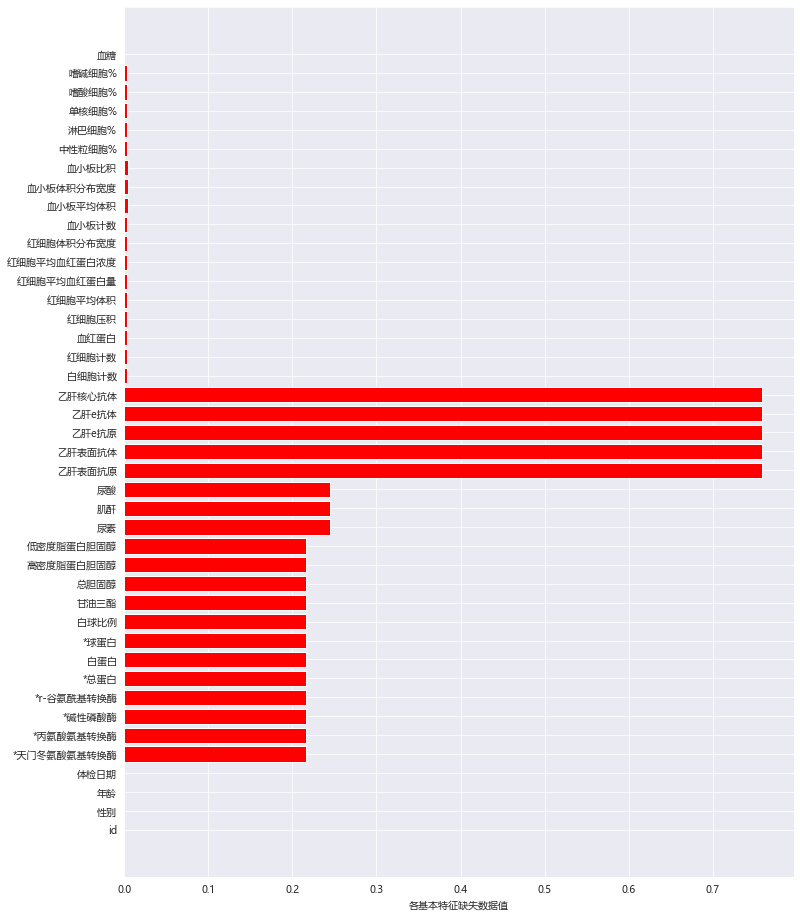

In [7]:
#ÂêÑÁâπÂæÅÁº∫Â§±ÊØî‰æãÂèØËßÜÂåñ
color = sns.color_palette()
sns.set_style('darkgrid')
plt.rcParams['font.family']='Microsoft YaHei'#Ê≠£Â∏∏ÊòæÁ§∫‰∏≠Êñá
mpl.rcParams['axes.unicode_minus'] = False#Ê≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑

null_percentage = train.isnull().sum()/len(train)#ËÆ°ÁÆóÊØèÂàóÁº∫Â§±ÊØî‰æã
#print ('The null data percentage is:',null_percentage)
null_percentage = null_percentage.reset_index()
null_percentage.columns = ['column_name','column_value']#ËÆæÁΩÆÂàóÂêç
ind = np.arange(null_percentage.shape[0])
fig , ax = plt.subplots(figsize = (12, 16))
rects = ax.barh(ind,null_percentage.column_value.values,color='red')
ax.set_yticks(ind)#ËÆæÁΩÆyËΩ¥ÂàªÂ∫¶ÂÄº‰∏∫ 0-41
ax.set_yticklabels(null_percentage.column_name.values,rotation='horizontal')#ËÆæÁΩÆyËΩ¥ÂàªÂ∫¶Ê†áÁ≠æ
ax.set_xlabel("ÂêÑÂü∫Êú¨ÁâπÂæÅÁº∫Â§±Êï∞ÊçÆÂÄº")
plt.savefig('null_percent.jpg')
plt.show()


‰ªé‰ª•‰∏äÁªìÊûúÁúãÔºåÈô§‰∫ÜÊÇ£ËÄÖÁöÑÂü∫Êú¨‰ø°ÊÅØÂ§ñÔºåÊï∞ÊçÆ‰∏≠ÁªùÂ§ßÂ§öÊï∞ÁöÑÂàóÂ≠òÂú®Áº∫Â§±ÂÄº„ÄÇ‰ªéÁªüËÆ°ÁªìÊûúÊù•ÁúãÔºåÊúÄÂ§ßÁöÑ‰∏ÄÂàóÁº∫Â§±ÂÄºËææÂà∞4279‰∏™Ôºå‰∏îÊúâÂ§ö‰∏™ÂàóÁöÑÁº∫Â§±ÂÄºË∂ÖËøá1000‰∏™„ÄÇÈÄöËøáÊü±Áä∂ÂõæÂèØÁü•Ôºå‰πôËÇùÁõ∏ÂÖ≥Ê£ÄÊµãÂÄºÁöÑÁº∫Â§±ÊØî‰æãÊúÄÈ´òÔºåÂàÜÊûêÂèØÁü•ÔºåËøôÊòØÊ∫ê‰∫éÊÇ£ËÄÖÈÄâÊã©Áõ∏ÂÖ≥Ê£ÄÊµãËæÉÂ∞ë„ÄÇ

## Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ

Âú®ÂØπÁº∫Â§±ÂÄºÁªüËÆ°ÂàÜÊûêÂêéÊàë‰ª¨ÂèëÁé∞‰πôËÇùÁ±ªÊ£ÄÊµãÂÄºÂ≠òÂú®Â§ßÈáèÁº∫Â§±ÔºåÈÄöÂ∏∏Ë∂ÖËøá60%‰ª•‰∏äÁº∫Â§±ÁöÑÊï∞ÊçÆÔºåÂèØÈááÁî®Âà†Èô§ËØ•ÂàóÊï∞ÊçÆÁöÑÊñπÂºè„ÄÇ

Êàë‰ª¨Â∞ÜÁº∫Â§±ÊØî‰æãÊúÄÂ§ßÁöÑ‰∫î‰∏™‰πôËÇùÁõ∏ÂÖ≥ÁâπÂæÅ‚Äò‰πôËÇùË°®Èù¢ÊäóÂéü‚ÄôÔºå‚Äò‰πôËÇùË°®Èù¢Êäó‰Ωì‚ÄôÔºå‚Äò‰πôËÇùeÊäóÂéü‚ÄôÔºå‚Äò‰πôËÇùeÊäó‰Ωì‚ÄôÔºå‚Äò‰πôËÇùÊ†∏ÂøÉÊäó‰Ωì‚ÄôÂà†Èô§„ÄÇÁî±‰∫éÊ≠§Ê¨°‰ªªÂä°ÈùûÊó∂Â∫èÊï∞ÊçÆÈ¢ÑÊµã‰ªªÂä°ÔºåÂõ†Ê≠§ÔºåÂçïÊ¨°‚Äò‰ΩìÊ£ÄÊó•Êúü‚ÄôÂπ∂‰∏çÊûÑÊàêÊúâÊïàÁöÑÊó∂Èó¥ÁâπÂæÅÔºåÂõ†Ê≠§Â∞Ü‰ΩìÊ£ÄÊó•ÊúüËøô‰∏ÄÈ°πÁâπÂæÅ‰πüÂà†Èô§Êéâ„ÄÇ

In [8]:
# ÊµãËØïÈõÜ
test=pd.read_csv("D:/edge/d_test_A.csv",encoding='gbk')
# Ê†áÁ≠æÈõÜ
validate=pd.read_csv("D:/edge/d_answer_A.csv",encoding='gbk')

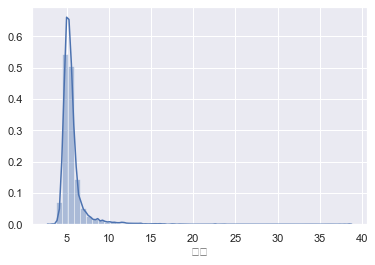

In [9]:
sns.set()#Ë°ÄÁ≥ñÂàÜÂ∏É
ax = sns.distplot(train['Ë°ÄÁ≥ñ'])

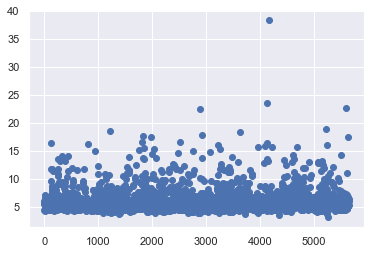

In [10]:
plt.scatter(range(len(train)),train['Ë°ÄÁ≥ñ'])
plt.show()

In [11]:
# ÂºÇÂ∏∏ÂÄºÂàÜÊûê‰∏éÂ§ÑÁêÜ,Âà†Èô§ÁâπÂà´Â§ßÁöÑ‚ÄòË°ÄÁ≥ñ‚ÄôÂºÇÂ∏∏ÂÄº
columns=len(train.columns)
train.drop(train.index[[i for i in train.index if train.iloc[i,columns-1]>20]],inplace=True)

In [12]:
del_feat=['‰πôËÇùË°®Èù¢ÊäóÂéü', '‰πôËÇùË°®Èù¢Êäó‰Ωì', '‰πôËÇùeÊäóÂéü', '‰πôËÇùeÊäó‰Ωì', '‰πôËÇùÊ†∏ÂøÉÊäó‰Ωì']
# Âà†Èô§ÁâπÂæÅ
feat=[]
for i in train.columns:
    if i not in del_feat:
        feat.append(i)
train=train[feat]

del_feat=['‰ΩìÊ£ÄÊó•Êúü']
# Âà†Èô§ÁâπÂæÅ
feat=[]
for i in train.columns:
    if i not in del_feat:
        feat.append(i)

train=train[feat]
feat.remove('Ë°ÄÁ≥ñ') #ÊµãËØïÈõÜ‰∏çÈúÄË¶Å‚ÄòË°ÄÁ≥ñ‚ÄôÂ±ûÊÄß
test=test[feat]

In [13]:
test['ÊÄßÂà´'] = test['ÊÄßÂà´'].map({'Áî∑':1,'Â•≥':0})#ÊµãËØïÈõÜÊõøÊç¢Â≠óÁ¨¶‰∏∫Êï∞Â≠ó
y_train = train["Ë°ÄÁ≥ñ"]
x_train = train.drop(['id','Ë°ÄÁ≥ñ'], axis=1)
x_test = test.drop('id', axis=1)

In [14]:
train.isnull().sum()

id                0
ÊÄßÂà´                0
Âπ¥ÈæÑ                0
*Â§©Èó®ÂÜ¨Ê∞®ÈÖ∏Ê∞®Âü∫ËΩ¨Êç¢ÈÖ∂    1220
*‰∏ôÊ∞®ÈÖ∏Ê∞®Âü∫ËΩ¨Êç¢ÈÖ∂      1220
*Á¢±ÊÄßÁ£∑ÈÖ∏ÈÖ∂         1220
*r-Ë∞∑Ê∞®ÈÖ∞Âü∫ËΩ¨Êç¢ÈÖ∂     1220
*ÊÄªËõãÁôΩ           1220
ÁôΩËõãÁôΩ            1220
*ÁêÉËõãÁôΩ           1220
ÁôΩÁêÉÊØî‰æã           1220
ÁîòÊ≤π‰∏âÈÖØ           1218
ÊÄªËÉÜÂõ∫ÈÜá           1218
È´òÂØÜÂ∫¶ËÑÇËõãÁôΩËÉÜÂõ∫ÈÜá      1218
‰ΩéÂØÜÂ∫¶ËÑÇËõãÁôΩËÉÜÂõ∫ÈÜá      1218
Â∞øÁ¥†             1377
ËÇåÈÖê             1377
Â∞øÈÖ∏             1377
ÁôΩÁªÜËÉûËÆ°Êï∞            16
Á∫¢ÁªÜËÉûËÆ°Êï∞            16
Ë°ÄÁ∫¢ËõãÁôΩ             16
Á∫¢ÁªÜËÉûÂéãÁßØ            16
Á∫¢ÁªÜËÉûÂπ≥Âùá‰ΩìÁßØ          16
Á∫¢ÁªÜËÉûÂπ≥ÂùáË°ÄÁ∫¢ËõãÁôΩÈáè       16
Á∫¢ÁªÜËÉûÂπ≥ÂùáË°ÄÁ∫¢ËõãÁôΩÊµìÂ∫¶      16
Á∫¢ÁªÜËÉû‰ΩìÁßØÂàÜÂ∏ÉÂÆΩÂ∫¶        16
Ë°ÄÂ∞èÊùøËÆ°Êï∞            16
Ë°ÄÂ∞èÊùøÂπ≥Âùá‰ΩìÁßØ          23
Ë°ÄÂ∞èÊùø‰ΩìÁßØÂàÜÂ∏ÉÂÆΩÂ∫¶        23
Ë°ÄÂ∞èÊùøÊØîÁßØ            23
‰∏≠ÊÄßÁ≤íÁªÜËÉû%           16
Ê∑ãÂ∑¥ÁªÜËÉû%            16
ÂçïÊ†∏ÁªÜËÉû%       

ÂÜçÊ¨°ÊâìÂç∞ËÆ≠ÁªÉÊï∞ÊçÆÂèëÁé∞ÔºåÊï∞ÊçÆ‰∏≠‰ªçÊúâËÆ∏Â§öÁº∫Â§±ÂÄºÔºåËøôÊó∂ÔºåÁî±‰∫éÁº∫Â§±ÂÄºÊâÄÂç†ÊØî‰æãËæÉÂ∞èÔºå‰ΩøÁî®Âπ≥ÂùáÂÄºËøõË°åÊèíË°•ÔºåÁ°Æ‰øùËøôÈÉ®ÂàÜÊï∞ÊçÆÂæó‰ª•‰øùÁïô‰ª•ÊîØÊåÅÊ®°ÂûãËÆ≠ÁªÉ„ÄÇ

In [15]:
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())

In [16]:
x_test.isnull().any()#Âà§Êñ≠Âì™‰∫õÂàóÂåÖÂê´Áº∫Â§±ÂÄº

ÊÄßÂà´             False
Âπ¥ÈæÑ             False
*Â§©Èó®ÂÜ¨Ê∞®ÈÖ∏Ê∞®Âü∫ËΩ¨Êç¢ÈÖ∂    False
*‰∏ôÊ∞®ÈÖ∏Ê∞®Âü∫ËΩ¨Êç¢ÈÖ∂      False
*Á¢±ÊÄßÁ£∑ÈÖ∏ÈÖ∂         False
*r-Ë∞∑Ê∞®ÈÖ∞Âü∫ËΩ¨Êç¢ÈÖ∂     False
*ÊÄªËõãÁôΩ           False
ÁôΩËõãÁôΩ            False
*ÁêÉËõãÁôΩ           False
ÁôΩÁêÉÊØî‰æã           False
ÁîòÊ≤π‰∏âÈÖØ           False
ÊÄªËÉÜÂõ∫ÈÜá           False
È´òÂØÜÂ∫¶ËÑÇËõãÁôΩËÉÜÂõ∫ÈÜá      False
‰ΩéÂØÜÂ∫¶ËÑÇËõãÁôΩËÉÜÂõ∫ÈÜá      False
Â∞øÁ¥†             False
ËÇåÈÖê             False
Â∞øÈÖ∏             False
ÁôΩÁªÜËÉûËÆ°Êï∞          False
Á∫¢ÁªÜËÉûËÆ°Êï∞          False
Ë°ÄÁ∫¢ËõãÁôΩ           False
Á∫¢ÁªÜËÉûÂéãÁßØ          False
Á∫¢ÁªÜËÉûÂπ≥Âùá‰ΩìÁßØ        False
Á∫¢ÁªÜËÉûÂπ≥ÂùáË°ÄÁ∫¢ËõãÁôΩÈáè     False
Á∫¢ÁªÜËÉûÂπ≥ÂùáË°ÄÁ∫¢ËõãÁôΩÊµìÂ∫¶    False
Á∫¢ÁªÜËÉû‰ΩìÁßØÂàÜÂ∏ÉÂÆΩÂ∫¶      False
Ë°ÄÂ∞èÊùøËÆ°Êï∞          False
Ë°ÄÂ∞èÊùøÂπ≥Âùá‰ΩìÁßØ        False
Ë°ÄÂ∞èÊùø‰ΩìÁßØÂàÜÂ∏ÉÂÆΩÂ∫¶      False
Ë°ÄÂ∞èÊùøÊØîÁßØ          False
‰∏≠ÊÄßÁ≤íÁªÜËÉû%         False
Ê∑ãÂ∑¥ÁªÜËÉû%          False
ÂçïÊ†∏ÁªÜ

### ÂèòÈáèÂàÜÂ∏ÉÂíåÁõ∏ÂÖ≥ÊÄß

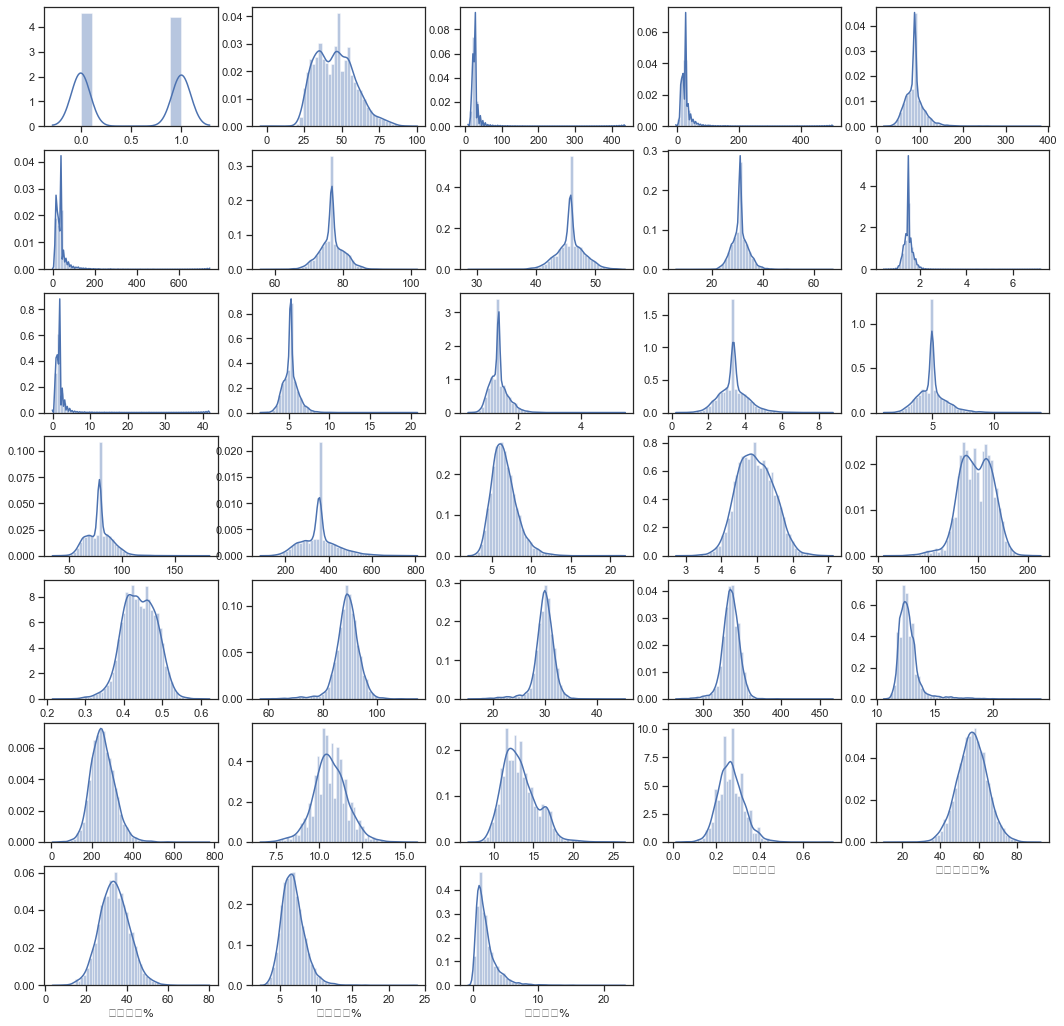

In [17]:
plt.figure(1,figsize=(18,18))
feat=feat[1:-1]
with sns.axes_style('ticks'):
    for i in range(len(feat)):
        tmp = x_train[feat[i]]
        plt.subplot(7,5,i+1)
        sns.distplot(tmp)
plt.show()

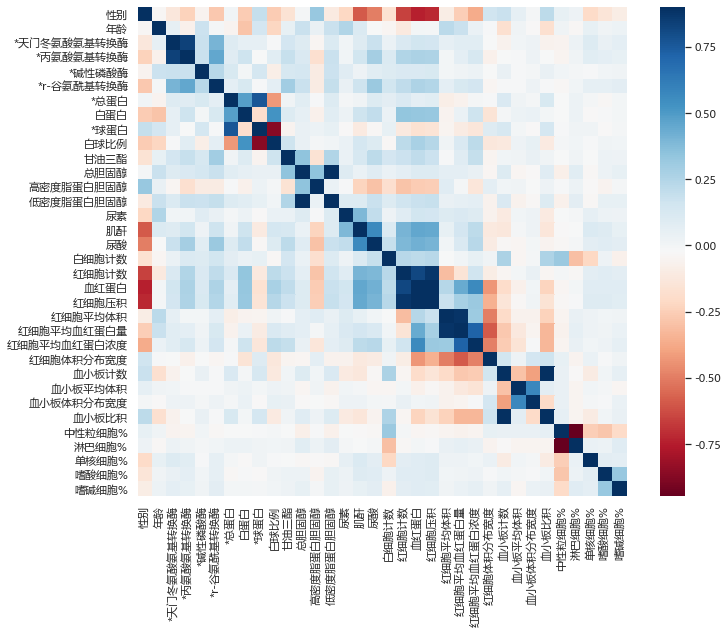

In [18]:
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # ËÆæÁΩÆplotÊòæÁ§∫‰∏≠Êñá
corrmat = x_train.corr() #corrmatÊòØÁõ∏ÂÖ≥ÊÄßÁü©Èòµ,Áü©Èòµ‰∏≠‰∏§‰∏™ÂèòÈáèÁõ∏‰∫§ÁöÑÊï∞ÂÄºË∂äÂ§ß,Ë°®Á§∫‰∏§ËÄÖ‰πãÈó¥Áõ∏ÂÖ≥ÊÄßË∂äÂº∫
f,ax = plt.subplots(figsize=(12,9)) #ÁªòÂà∂ÁîªÂ∏É
ax.set_xticklabels(corrmat,rotation='horizontal')
colormap=plt.cm.RdBu
sns.heatmap(corrmat, vmax =0.9,cmap=colormap,square=True) #ÂæóÂà∞ÁâπÂæÅÂÖ≥Á≥ªÁöÑÁÉ≠ÂäõÂõæü§£

ÂèØ‰ª•ÁúãÂà∞ÔºåÂêÑÁâπÂæÅÂèòÈáèÊï¥‰ΩìÁõ∏ÂÖ≥ÊÄß‰∏çÂº∫Ôºå‰ΩÜÁõ∏ÈÇªÂèòÈáèÈó¥ÔºàÂ¶ÇÁ∫¢ÁªÜËÉûËÆ°Êï∞„ÄÅË°ÄÁ∫¢ËõãÁôΩ„ÄÅÁ∫¢ÁªÜËÉûÂéãÁßØÔºâÈó¥Áõ∏ÂÖ≥ÊÄßËæÉÂº∫ÔºåÂõ†Ê≠§ÂèØ‰ª•ËÄÉËôëÊèêÂèñ‰∏ªË¶ÅÁâπÂæÅÔºåÂØπÊï∞ÊçÆËøõË°åÈôçÁª¥„ÄÇ

## ÁâπÂæÅÂ∑•Á®ã

ÊúâÊñáÁåÆËØÅÊòé‰∏≠ÊÄßÁ≤íÁªÜËÉû/Ê∑ãÂ∑¥ÁªÜËÉûÊØîÂÄºÂèØÁî®‰∫éËØÑ‰ª∑Â§öÁßçÁñæÁóÖÁä∂ÊÄÅÔºåÂõ†Ê≠§Êàë‰ª¨ÂèØ‰ª•Ê†πÊçÆÂ∑≤ÊúâÁöÑ‚Äò‰∏≠ÊÄßÁ≤íÁªÜËÉû‚ÄôÂíå‚ÄòÊ∑ãÂ∑¥ÁªÜËÉû‚ÄôÂ±ûÊÄßÁîüÊàêÊñ∞ÁöÑÁâπÂæÅ‚Äò‰∏≠Ê∑ãÊØî‚ÄôÔºö
'‰∏≠Ê∑ãÊØî' = '‰∏≠ÊÄßÁ≤íÁªÜËÉû'/'Ê∑ãÂ∑¥ÁªÜËÉû'
ÁôΩÁêÉÊØîÊòØËÇùÂäüËÉΩÊ£ÄÊü•‰∏≠ÁöÑ‰∏ÄÈ°πÈáçË¶ÅÂèÇËÄÉÊåáÊ†áÔºåÂèçÊò†ÁöÑÊòØËÇùËÑèÁöÑÂêàÊàêÂäüËÉΩÔºåÂú®ËÇùÁóÖÁöÑËØäÊñ≠‰∏äÊúâÈáçË¶ÅÊÑè‰πâ„ÄÇÊàë‰ª¨‰πüÂèØ‰ª•Ê†πÊçÆÂ∑≤ÊúâÁöÑ‚ÄòÁôΩËõãÁôΩ‚ÄôÂíå‚ÄòÁêÉËõãÁôΩ‚ÄôÂ±ûÊÄßÁîüÊàêÊñ∞ÁöÑÁâπÂæÅ‚ÄòÁôΩÁêÉÊØî‚ÄôÔºö
'ÁôΩÁêÉÊØî'= 'ÁôΩËõãÁôΩ'/'ÁêÉËõãÁôΩ'

In [19]:
x_train['‰∏≠Ê∑ãÊØî'] =x_train['‰∏≠ÊÄßÁ≤íÁªÜËÉû%']/x_train['Ê∑ãÂ∑¥ÁªÜËÉû%']
x_train['ÁôΩÁêÉÊØî'] = x_train['ÁôΩËõãÁôΩ']/x_train['*ÁêÉËõãÁôΩ']
x_test['‰∏≠Ê∑ãÊØî'] =x_test['‰∏≠ÊÄßÁ≤íÁªÜËÉû%']/x_test['Ê∑ãÂ∑¥ÁªÜËÉû%']
x_test['ÁôΩÁêÉÊØî'] = x_test['ÁôΩËõãÁôΩ']/x_test['*ÁêÉËõãÁôΩ']
x_train

ÊÄßÂà´  Âπ¥ÈæÑ  *Â§©Èó®ÂÜ¨Ê∞®ÈÖ∏Ê∞®Âü∫ËΩ¨Êç¢ÈÖ∂  *‰∏ôÊ∞®ÈÖ∏Ê∞®Âü∫ËΩ¨Êç¢ÈÖ∂  *Á¢±ÊÄßÁ£∑ÈÖ∏ÈÖ∂  *r-Ë∞∑Ê∞®ÈÖ∞Âü∫ËΩ¨Êç¢ÈÖ∂   *ÊÄªËõãÁôΩ    ÁôΩËõãÁôΩ   *ÁêÉËõãÁôΩ  \
0      0  41        24.96      23.10   99.59       20.23  76.88  49.60  27.28   
1      0  41        24.57      36.25   67.21       79.00  79.43  47.76  31.67   
2      0  46        20.82      15.23   63.69       38.17  86.23  48.00  38.23   
3      1  22        14.99      10.59   74.08       20.22  70.98  44.02  26.96   
4      1  48        20.07      14.78   75.79       22.72  78.05  41.83  36.22   
...   ..  ..          ...        ...     ...         ...    ...    ...    ...   
5636   1  47        18.82      14.56   54.02       14.75  77.44  44.27  33.17   
5637   1  31        21.08      13.07   76.03       13.80  80.72  47.21  33.51   
5638   1  80        22.95      21.51  106.37       32.88  75.29  40.43  34.86   
5639   1  55        33.54      24.94   97.60       19.16  78.50  43.10  35.40   
5640   1  30        21.37      20.77   52.54       26.94  79.86  49.25  30.61   

      ÁôΩÁêÉÊØî‰æã  ...  Ë°ÄÂ∞èÊùøÂπ≥Âùá‰ΩìÁßØ  Ë°ÄÂ∞èÊùø‰ΩìÁßØÂàÜÂ∏ÉÂÆΩÂ∫¶  Ë°ÄÂ∞èÊùøÊØîÁßØ  ‰∏≠ÊÄßÁ≤íÁªÜËÉû%  Ê∑ãÂ∑¥ÁªÜËÉû%  ÂçïÊ†∏ÁªÜËÉû%  ÂóúÈÖ∏ÁªÜËÉû%  \
0     1.82  ...      9.9       17.4  0.164    54.1   34.2    6.5    4.7   
1     1.51  ...      9.2       10.3  0.260    52.0   36.7    5.8    4.7   
2     1.26  ...      8.3       16.6  0.199    48.1   40.3    7.7    3.2   
3     1.63  ...     10.3       10.8  0.260    41.7   46.5    6.7    4.6   
4     1.15  ...     11.1       14.0  0.350    56.6   33.1    9.1    0.6   
...    ...  ...      ...        ...    ...     ...    ...    ...    ...   
5636  1.33  ...     10.6       12.0  0.210    48.8   43.3    6.5    0.7   
5637  1.41  ...     11.1       13.7  0.230    60.6   31.3    5.5    1.6   
5638  1.16  ...     10.4       12.6  0.340    61.1   30.1    6.0    2.2   
5639  1.22  ...     12.2       16.3  0.270    55.0   36.9    6.8    0.7   
5640  1.61  ...      9.9       10.8  0.360    58.5   31.2    5.8    3.7   

      ÂóúÁ¢±ÁªÜËÉû%       ‰∏≠Ê∑ãÊØî       ÁôΩÁêÉÊØî  
0       0.6  1.581871  1.818182  
1       0.8  1.416894  1.508052  
2       0.8  1.193548  1.255558  
3       0.5  0.896774  1.632789  
4       0.6  1.709970  1.154887  
...     ...       ...       ...  
5636    0.7  1.127021  1.334640  
5637    1.0  1.936102  1.408833  
5638    0.6  2.029900  1.159782  
5639    0.6  1.490515  1.217514  
5640    0.8  1.875000  1.608951  

[5637 rows x 36 columns]

In [20]:
#ÂΩí‰∏ÄÂåñ
scaler = preprocessing.StandardScaler() 
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

## Âõ†Â≠êÂàÜÊûê

In [21]:
y=y_train
x=X_train

In [22]:
#ÂÖÖÂàÜÊÄßÂíåÁõ∏ÂÖ≥ÊÄßÊ£ÄÈ™å
print('Â∑¥ÁâπÂà©ÁêÉÂΩ¢Â∫¶Ê£ÄÈ™å')
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(x)
print('Âç°ÊñπÂÄºÔºö',chi_square_value,'PÂÄº', p_value)

#Áõ∏ÂÖ≥ÊÄßÊ£ÄÈ™åkmoË¶ÅÂ§ß‰∫é0.6
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(x)
print('KMOÊ£ÄÈ™åÔºö',kmo_model)

Â∑¥ÁâπÂà©ÁêÉÂΩ¢Â∫¶Ê£ÄÈ™å
Âç°ÊñπÂÄºÔºö nan PÂÄº nan
KMOÊ£ÄÈ™åÔºö 0.5133016769824001


Áõ∏ÂÖ≥Áü©ÈòµÁâπÂæÅÂÄºÔºö [5.95826738e+00 3.37933532e+00 3.25954109e+00 2.87860150e+00
 2.32319267e+00 2.06627880e+00 1.76348172e+00 1.68305008e+00
 1.28952366e+00 1.20850970e+00 1.15108055e+00 1.01455072e+00
 9.58370138e-01 9.06285267e-01 7.39544715e-01 7.09954802e-01
 6.88423168e-01 6.41867802e-01 6.18582442e-01 5.53906046e-01
 5.03823828e-01 4.49387632e-01 3.66117013e-01 3.24537397e-01
 2.30988245e-01 1.34449842e-01 9.30404278e-02 8.03089761e-02
 1.12800501e-02 8.41510329e-03 2.72679005e-03 1.15519373e-03
 1.07998460e-03 3.39766045e-04 2.19927805e-06 3.26398031e-16]


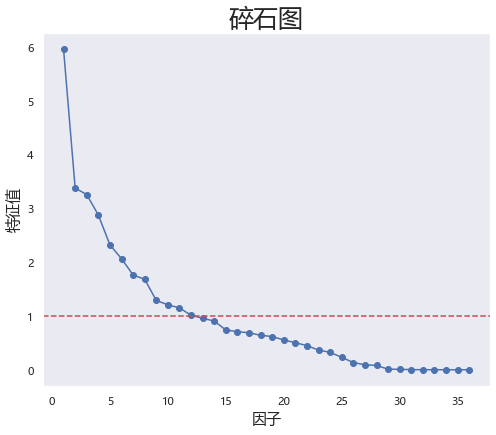

In [23]:
#Êü•ÁúãÁõ∏ÂÖ≥Áü©ÈòµÁâπÂæÅÂÄº
fa = FactorAnalyzer(36, rotation='varimax',method='principal',impute='mean')
fa.fit(x)
ev, v = fa.get_eigenvalues()
print('Áõ∏ÂÖ≥Áü©ÈòµÁâπÂæÅÂÄºÔºö',ev)
#Create scree plot using matplotlib
plt.figure(figsize=(8, 6.5))
plt.scatter(range(1,x.shape[1]+1),ev)
plt.plot(range(1,x.shape[1]+1),ev)
plt.axhline(y=1, color='r', linestyle='--')
plt.title('Á¢éÁü≥Âõæ',fontdict={'weight':'normal','size': 25})
plt.xlabel('Âõ†Â≠ê',fontdict={'weight':'normal','size': 15})
plt.ylabel('ÁâπÂæÅÂÄº',fontdict={'weight':'normal','size': 15})
plt.grid()
# plt.savefig('E:/suishitu.jpg')
plt.show()

#Á°ÆÂÆöÂõ†Â≠ê‰∏™Êï∞
n_factors = sum(ev>1)

In [24]:
#ÂèñÊóãËΩ¨ÂêéÁöÑÁªìÊûú
fa2 = FactorAnalyzer(n_factors,rotation='varimax',method='principal')
fa2.fit(x)
#ÁªôÂá∫Ë¥°ÁåÆÁéá
var = fa2.get_factor_variance()

#ËÆ°ÁÆóÂõ†Â≠êÂæóÂàÜ
fa2_score = fa2.transform(x)

#ÂæóÂàÜË°®
column_list = ['fac'+str(i) for i in np.arange(n_factors)+1]
fa_score = pd.DataFrame(fa2_score,columns=column_list)
data=pd.DataFrame()
for col in fa_score.columns:
    data[col] = fa_score[col]
#print("\nÂêÑÂõ†Â≠êÂæóÂàÜ:\n",fa_score)    

#ÊñπÂ∑ÆË¥°ÁåÆË°®
df_fv = pd.DataFrame()
df_fv['Âõ†Â≠ê'] = column_list
df_fv['ÊñπÂ∑ÆË¥°ÁåÆ'] = var[1]
df_fv['Á¥ØËÆ°ÊñπÂ∑ÆË¥°ÁåÆ'] = var[2]
df_fv['ÊñπÂ∑ÆË¥°ÁåÆÂç†ÊØî'] = var[1]/var[1].sum()
print("\nÊñπÂ∑ÆË¥°ÁåÆË°®:\n",df_fv)  


ÊñπÂ∑ÆË¥°ÁåÆË°®:
        Âõ†Â≠ê      ÊñπÂ∑ÆË¥°ÁåÆ    Á¥ØËÆ°ÊñπÂ∑ÆË¥°ÁåÆ    ÊñπÂ∑ÆË¥°ÁåÆÂç†ÊØî
0    fac1  0.109709  0.109709  0.141179
1    fac2  0.094341  0.204050  0.121402
2    fac3  0.083049  0.287099  0.106872
3    fac4  0.082895  0.369994  0.106673
4    fac5  0.067421  0.437414  0.086760
5    fac6  0.061020  0.498435  0.078524
6    fac7  0.058879  0.557313  0.075768
7    fac8  0.049345  0.606659  0.063500
8    fac9  0.048251  0.654910  0.062091
9   fac10  0.046231  0.701141  0.059492
10  fac11  0.038587  0.739728  0.049656
11  fac12  0.037365  0.777093  0.048083


In [25]:
Q=pd.DataFrame(fa2.loadings_)
Q.to_csv("Âõ†Â≠êËΩΩËç∑Áü©Èòµ.csv")

In [26]:
new_columns=['Á∫¢ÁªÜËÉûÊï∞Èáè','ÁôΩÁêÉÊØî','Ë°ÄÁ∫¢ËõãÁôΩ','‰∏≠Ê∑ãÊØî','ËÇùÂäüËÉΩ','ËÉÜÂõ∫ÈÜá','Ë°ÄÂ∞èÊùøÊï∞Èáè','ËÇæÂäüËÉΩ','ÁôΩËõãÁôΩ','Ë°ÄÂ∞èÊùø‰ΩìÁßØ','ÂóúÈÖ∏ÂóúÁ¢±ÁªÜËÉû','ÂçïÊ†∏ÁªÜËÉû']

In [27]:
reduced_x_train= fa2.transform(x_train)
fa3 = FactorAnalyzer(n_factors,rotation='varimax',method='principal')
fa3.fit(x_test)
reduced_x_test= fa3.transform(x_test)

In [28]:
#ÂΩí‰∏ÄÂåñ
scaler = preprocessing.StandardScaler() 
reduced_x_train = scaler.fit_transform(reduced_x_train)
reduced_x_train = scaler.fit_transform(reduced_x_train)

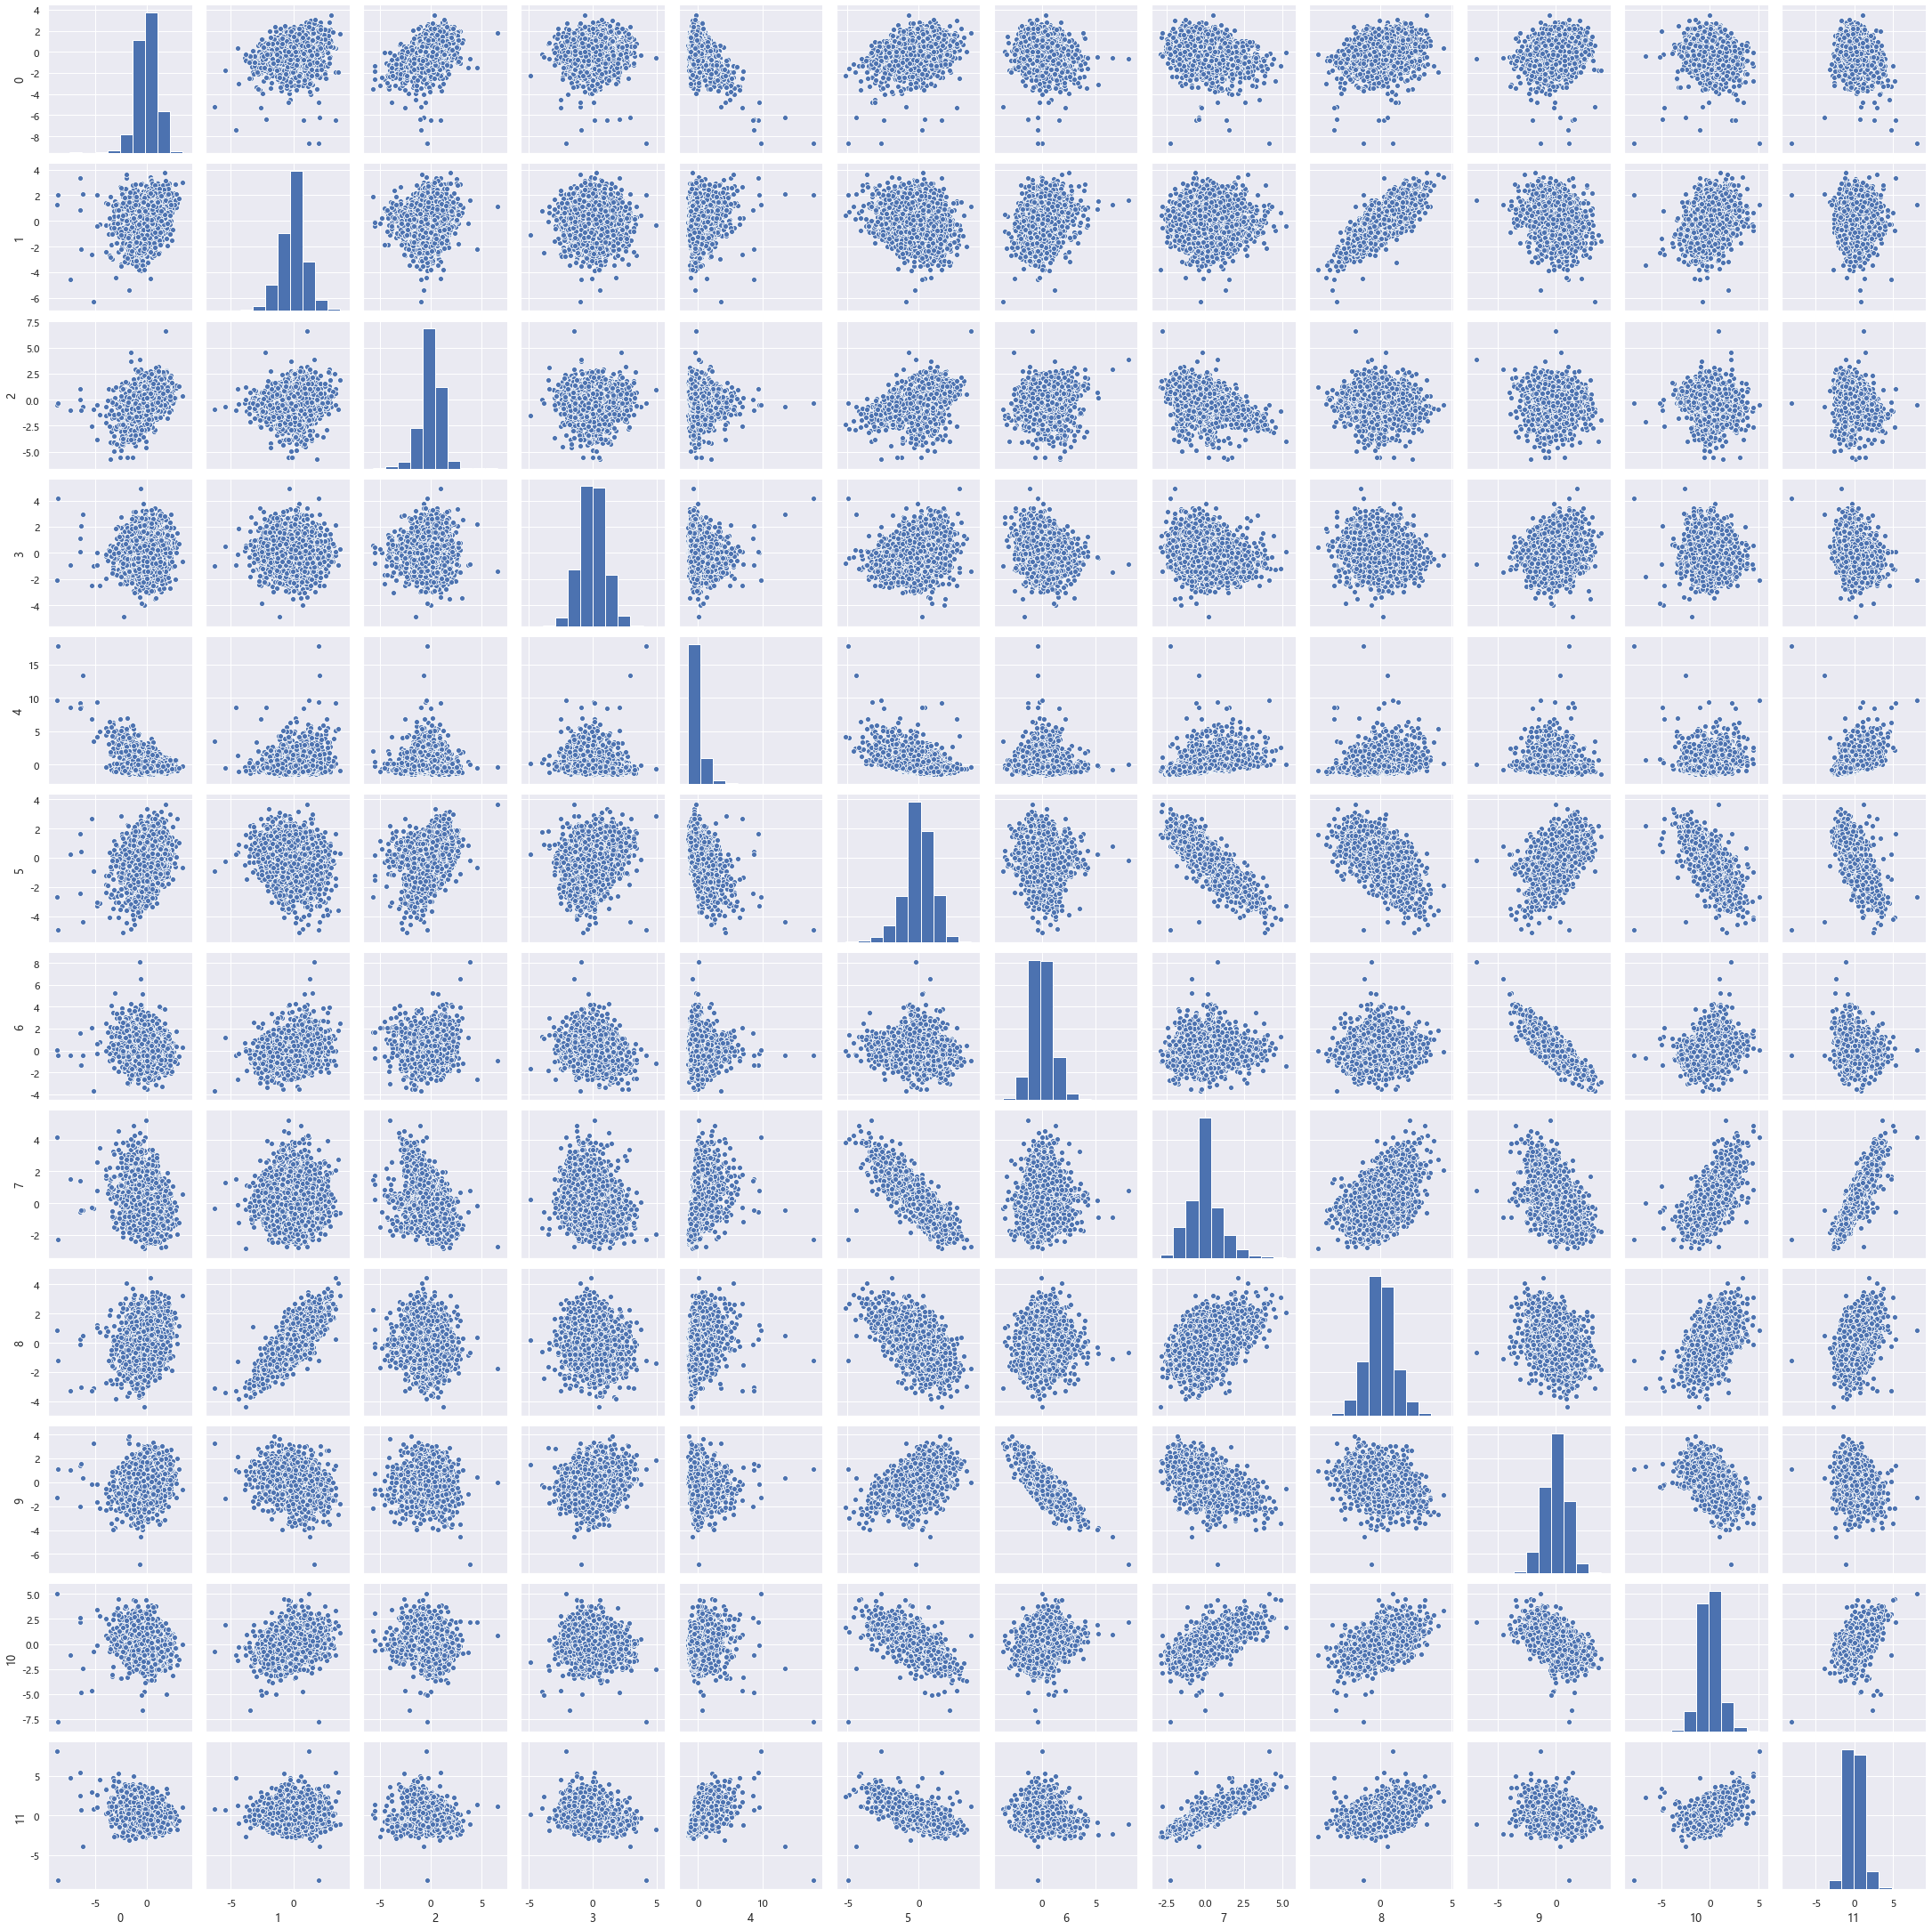

In [29]:
sns.pairplot(pd.DataFrame(reduced_x_train))

## ÂõûÂΩíÊ®°Âûã

In [35]:
#Á∫øÊÄßÂõûÂΩí

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model = model.fit(reduced_x_train, y_train)
y_pred = model.predict(reduced_x_test)
train_pred=model.predict(reduced_x_train)
#y_pred
print(pd.Series(model.coef_))
print((mean_squared_error(validate,y_pred)))
print((mean_squared_error(y_train,train_pred)))
#print(model.score(reduced_x_test, validate))

0     0.217641
1    -0.037115
2     0.012644
3     0.028252
4     0.495600
5     0.834402
6    -0.354154
7     0.538120
8    -0.074595
9    -0.348394
10    0.117870
11   -0.149434
dtype: float64
3.7779881968250475
1.7919526819291733


## import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
model = sm.OLS(y_train,reduced_x_train) 
results = model.fit()
print(results.summary())

In [68]:
#ÈöèÊú∫Ê£ÆÊûóÂõûÂΩí
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(reduced_x_train,y_train)
forest_train_pred = forest.predict(reduced_x_train)
forest_test_pred = forest.predict(reduced_x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(validate,forest_test_pred)))


MSE train data: 0.273, MSE test data: 3.141


In [39]:
#XGBoost
import xgboost as xgb
dtrain = xgb.DMatrix(reduced_x_train, label=y_train) #Áî®ËÆ≠ÁªÉÈõÜËÆ≠ÁªÉxgboostÊ®°Âûã
dtest = xgb.DMatrix(reduced_x_test) #Âú®ÊµãËØïÈõÜ‰∏äÊ£ÄÈ™åxgboostÊ®°Âûã

#ËÆæÁΩÆxgboostÂèÇÊï∞
params = {'booster': 'gbtree',#Âü∫‰∫éÊ†ë
          'objective': 'reg:linear',#ÊääobjectiveËÆæÁΩÆÊàêÁ∫øÊÄßÂõûÂΩí
          'max_depth': 5, # Ê†ëÁöÑÊúÄÂ§ßÊ∑±Â∫¶
          'gamma':0.1 , # ÊåáÂÆö‰∫ÜËäÇÁÇπÂàÜË£ÇÊâÄÈúÄÁöÑÊúÄÂ∞èÊçüÂ§±ÂáΩÊï∞‰∏ãÈôçÂÄº„ÄÇËøô‰∏™ÂèÇÊï∞ÁöÑÂÄºË∂äÂ§ßÔºåÁÆóÊ≥ïË∂ä‰øùÂÆà
          'subsample': 0.7,#ÊØè‰∏™ÂÜ≥Á≠ñÊ†ëÊâÄÁî®ÁöÑÂ≠êÊ†∑Êú¨Âç†ÊÄªÊ†∑Êú¨ÁöÑÊØî‰æãÔºà‰ΩúÁî®‰∫éÊ†∑Êú¨Ôºâ
          'colsample_bytree': 0.5, # Âª∫Á´ãÊ†ëÊó∂ÂØπÁâπÂæÅÈöèÊú∫ÈááÊ†∑ÁöÑÊØî‰æãÔºà‰ΩúÁî®‰∫éÁâπÂæÅÔºâ
          'min_child_weight': 12,  # 5~10,Â≠êËäÇÁÇπ‰∏≠ÊúÄÂ∞èÁöÑÊ†∑Êú¨ÊùÉÈáçÂíåÔºåÂç≥Ë∞ÉÂ§ßËøô‰∏™ÂèÇÊï∞ËÉΩÂ§üÊéßÂà∂ËøáÊãüÂêà
          'learning_rate': 0.01,  # Ê≠•Èïø
          }

watchlist = [(dtrain, 'ËÆ≠ÁªÉËØØÂ∑Æ')] # ËæìÂá∫ËÆ≠ÁªÉËøáÁ®ã
model = xgb.train(params, dtrain, num_boost_round=200, evals=watchlist)  # ËÆ≠ÁªÉÊ®°Âûã, num_boost_round‰∏∫Ëø≠‰ª£Ê¨°Êï∞
y_pred = model.predict(dtest)
train_pred=model.predict(dtrain)
#print(y_pred)

[11:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:5.26295
[1]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:5.21407
[2]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:5.16564
[3]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:5.11783
[4]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:5.07050
[5]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:5.02363
[6]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.97715
[7]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.93132
[8]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.88588
[9]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.84097
[10]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.79663
[11]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.75265
[12]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.70915
[13]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.66648
[14]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.62390
[15]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.58204
[16]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.54031
[17]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.49898
[18]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.45837
[19]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.41803
[20]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.37821
[21]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.33887
[22]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.29997
[23]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.26136
[24]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.22339
[25]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.18566
[26]	ËÆ≠ÁªÉËØØÂ∑Æ-rmse:4.14

In [40]:
print((mean_squared_error(validate,y_pred)))
print((mean_squared_error(y_train,train_pred)))

2.6525524940365703
2.102843340087867


In [46]:
model.get_fscore()

{'f4': 447,
 'f3': 250,
 'f2': 266,
 'f11': 335,
 'f6': 198,
 'f10': 298,
 'f1': 247,
 'f7': 394,
 'f9': 210,
 'f0': 344,
 'f8': 201,
 'f5': 510}

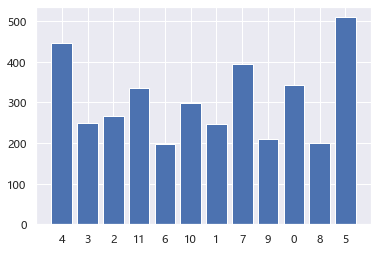

In [67]:
plt.bar(range(12),pd.Series(model.get_fscore()))
plt.xticks(range(12),[4,3,2,11,6,10,1,7,9,0,8,5])
plt.show()